In [2]:
"""import sys
!{sys.executable} -m pip install mplsoccer"""


'import sys\n!{sys.executable} -m pip install mplsoccer'

In [3]:
from mplsoccer import Sbopen
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen
import numpy as np

parser = Sbopen()

df_competitions = parser.competition()


In [4]:
df_competitions.sample(50)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
43,11,27,Spain,La Liga,male,False,False,2015/2016,2024-05-16T14:06:52.149840,2021-06-13T16:17:31.694,None,2024-05-16T14:06:52.149840
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
13,16,41,Europe,Champions League,male,False,False,2008/2009,2024-02-13T07:02:54.657056,2021-06-13T16:17:31.694,None,2024-02-13T07:02:54.657056
45,11,25,Spain,La Liga,male,False,False,2013/2014,2022-07-23T12:18:49.547396,2021-06-13T16:17:31.694,None,2022-07-23T12:18:49.547396
32,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530
60,7,27,France,Ligue 1,male,False,False,2015/2016,2024-01-07T06:23:44.277971,None,None,2024-01-07T06:23:44.277971
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
34,43,272,International,FIFA World Cup,male,False,True,1970,2024-02-13T14:23:06.735299,None,None,2024-02-13T14:23:06.735299
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250


**Filter for relevant leagues**

In [5]:
df_relevant = df_competitions.dropna(subset=["match_available_360"])

df_relevant = df_relevant[
    (df_relevant["competition_gender"] == "male") &
    (df_relevant["competition_name"].isin(["1. Bundesliga", "FIFA World Cup", "UEFA Euro"]))
]

print(df_relevant['competition_name'].unique())
print(df_relevant['season_name'].unique())

['1. Bundesliga' 'FIFA World Cup' 'UEFA Euro']
['2023/2024' '2022' '2024' '2020']


In [6]:
print(df_relevant.columns)

Index(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'competition_youth', 'competition_international',
       'season_name', 'match_updated', 'match_updated_360',
       'match_available_360', 'match_available'],
      dtype='object')


In [7]:
all_matches = pd.DataFrame()

for _, row in df_relevant.iterrows():
    comp_id = row['competition_id']
    season_id = row['season_id']
    
    try:
        df_matches = parser.match(competition_id=comp_id, season_id=season_id)
        df_matches['competition_name'] = row['competition_name']
        df_matches['season_name'] = row['season_name']
        
        all_matches = pd.concat([all_matches, df_matches], ignore_index=True)
    except Exception as e:
        print(f"Error retrieving matches for competition {comp_id}, season {season_id}: {e}")

In [8]:
all_matches.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3895302,2024-04-14,2024-04-14 17:30:00,5,0,available,available,2024-05-10 16:57:53.017895,2024-05-10 17:03:59.613154,29,...,1,Regular Season,377,BayArena,85,Germany,234.0,Harm Osmers,85.0,Germany
1,3895292,2024-04-06,2024-04-06 15:30:00,0,1,available,available,2024-05-12 21:04:50.061716,2024-05-12 21:08:37.897296,28,...,1,Regular Season,560,Stadion An der Alten Försterei,85,Germany,235.0,Benjamin Brand,85.0,Germany
2,3895333,2024-05-05,2024-05-05 18:30:00,1,5,available,available,2024-05-14 16:23:06.325967,2024-05-14 16:32:13.483516,32,...,1,Regular Season,116458,Deutsche Bank Park,85,Germany,237.0,Christian Dingert,85.0,Germany
3,3895340,2024-05-12,2024-05-12 20:30:00,0,5,available,available,2024-05-14 10:09:25.875345,2024-05-14 16:46:08.459843,33,...,1,Regular Season,550,Vonovia Ruhrstadion,85,Germany,235.0,Benjamin Brand,85.0,Germany
4,3895348,2024-05-18,2024-05-18 16:30:00,2,1,available,available,2024-05-20 10:11:27.857660,2024-05-20 10:33:09.140760,34,...,1,Regular Season,377,BayArena,85,Germany,837.0,Matthias Jöllenbeck,85.0,Germany


In [9]:
all_matches.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [10]:
print(len(all_matches['match_id'].unique()))

200


In [11]:
all_events = pd.DataFrame()

for _, match in all_matches.iterrows():
    match_id = match['match_id']
    competition_name = match['competition_name']
    season_name = match['season_name']
    
    try:
        df_event, _, _, _ = parser.event(match_id)
        df_event['match_id'] = match_id
        df_event['competition_name'] = competition_name
        df_event['season_name'] = season_name
        
        all_events = pd.concat([all_events, df_event], ignore_index=True)
    except Exception as e:
        print(f"Skipping match {match_id}: {e}")

In [12]:
all_events.sample(50)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,shot_deflected,foul_committed_offensive,pass_miscommunication,pass_no_touch,shot_open_goal,dribble_no_touch,shot_follows_dribble,half_start_late_video_start,shot_redirect,player_off_permanent
117164,8267d15e-f876-4461-b368-3772b50fd285,4000,2,00:36:33.836000,81,33,133,0.000000,3895153,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242739,d0f32177-c29d-42ab-85ec-fcfe830164c4,2727,2,00:27:00.045000,72,0,119,NaN,3869117,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470501,c865d621-be3a-4430-a1bd-100f3fc621e6,3034,2,00:27:19.963000,72,19,116,NaN,3930168,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589446,1f92cb55-e317-4ed2-af1b-978930475a32,1793,2,00:01:18.501000,46,18,89,NaN,3788755,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628554,f81f2432-f265-4459-a65c-af6d675482ee,3375,2,00:46:47.464000,91,47,180,1.534777,3794688,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176507,17842a8e-6973-44f1-b39c-eeee3371a6b7,1986,2,00:17:45.900000,62,45,136,0.000000,3857260,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161652,9d7b2b14-24d6-482f-94ad-f2bf1827ec6d,3089,2,00:33:09.128000,78,9,133,0.000000,3869321,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28029,cab4ddbd-eed1-41f1-bb60-249c006cf6f2,815,1,00:19:01.991000,19,1,35,0.696633,3895250,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542133,542cf680-6f27-49c8-8849-d13871e58cc2,3415,2,00:40:52.391000,85,52,143,NaN,3930166,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498217,73fbbbc1-c3db-4628-bc90-b6b102d7db50,1461,1,00:37:40.887000,37,40,75,9.104134,3938641,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
all_events.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,shot_deflected,foul_committed_offensive,pass_miscommunication,pass_no_touch,shot_open_goal,dribble_no_touch,shot_follows_dribble,half_start_late_video_start,shot_redirect,player_off_permanent
0,794ec549-5288-4d1a-93e8-0fc6d3968784,1,1,00:00:00,0,0,1,0.000000,3895302,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3a9a2c57-b177-47ed-9447-11f081b0e388,2,1,00:00:00,0,0,1,0.000000,3895302,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1f956a2b-ece0-475b-8802-e82ed922c307,3,1,00:00:00,0,0,1,0.000000,3895302,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79b90fbb-2cfd-419b-90f4-f0e5980c47d3,4,1,00:00:00,0,0,1,0.000000,3895302,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,221b0c8d-6386-4ae8-bb4a-a1dc98742312,5,1,00:00:03.417000,0,3,2,0.453249,3895302,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(len(all_events["match_id"].unique()))


200


In [15]:
from mplsoccer import Sbopen
import pandas as pd

parser = Sbopen(dataframe=False)

all_frames = []

for _, match in all_matches.iterrows():
    match_id = match['match_id']
    
    try:
        frames, visible = parser.frame(match_id)


        all_frames.append({
            'match_id': match_id,
            'frames': frames,
            'visible': visible
        })
        
    except Exception as e:
        print(f"Skipping frames for match {match_id}: {e}")


In [16]:
from collections import defaultdict

event_data = {}

for match_data in all_frames:
    visible_list = match_data['visible'] 
    frames_list = match_data['frames']   

    freeze_frame_map = defaultdict(list)
    for frame in frames_list:
        event_id = frame.get('event_id') or frame.get('id')
        freeze_frame_map[event_id].append(frame)

    for visible_entry in visible_list:
        event_id = visible_entry['id']
        event_data[event_id] = {
            'visible_area': visible_entry['visible_area'],
            'freeze_frame': freeze_frame_map.get(event_id, [])
        }

all_events['visible_area'] = all_events['id'].map(lambda x: event_data.get(x, {}).get('visible_area'))
all_events['freeze_frame'] = all_events['id'].map(lambda x: event_data.get(x, {}).get('freeze_frame'))


In [17]:
def plot_event_with_360(event_row, show_event_location=True):
    p = Pitch(pitch_type='statsbomb')
    fig, ax = p.draw(figsize=(12, 8))

    if isinstance(event_row['visible_area'], list) and len(event_row['visible_area']) >= 2:
        visible_area = np.array(event_row['visible_area']).reshape(-1, 2)
        p.polygon([visible_area], color=(1, 0, 0, 0.3), ax=ax)

        if isinstance(event_row['freeze_frame'], list) and len(event_row['freeze_frame']) > 0:
            freeze_frame_df = pd.DataFrame(event_row['freeze_frame'])

            teammate_locs = freeze_frame_df[freeze_frame_df['teammate']]
            opponent_locs = freeze_frame_df[~freeze_frame_df['teammate']]

            p.scatter(teammate_locs['x'], teammate_locs['y'],
                      c='orange', s=80, ec='k', ax=ax, label='Teammates')
            p.scatter(opponent_locs['x'], opponent_locs['y'],
                      c='dodgerblue', s=80, ec='k', ax=ax, label='Opponents')
    else:
        print("No visible_area available; only plotting event location.")

    if show_event_location and ('x' in event_row and 'y' in event_row):
        if pd.notna(event_row['x']) and pd.notna(event_row['y']):
            p.scatter(event_row['x'], event_row['y'],
                      c='red', s=100, marker='*', ax=ax, label='Event')

            label_text = event_row.get('type_name', 'Event')
            if pd.notna(event_row.get('sub_type_name')):
                label_text += f" ({event_row['sub_type_name']})"

            ax.text(event_row['x'] + 2, event_row['y'] + 2, label_text,
                    fontsize=12, color='black', weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.legend()
    plt.show()


nan


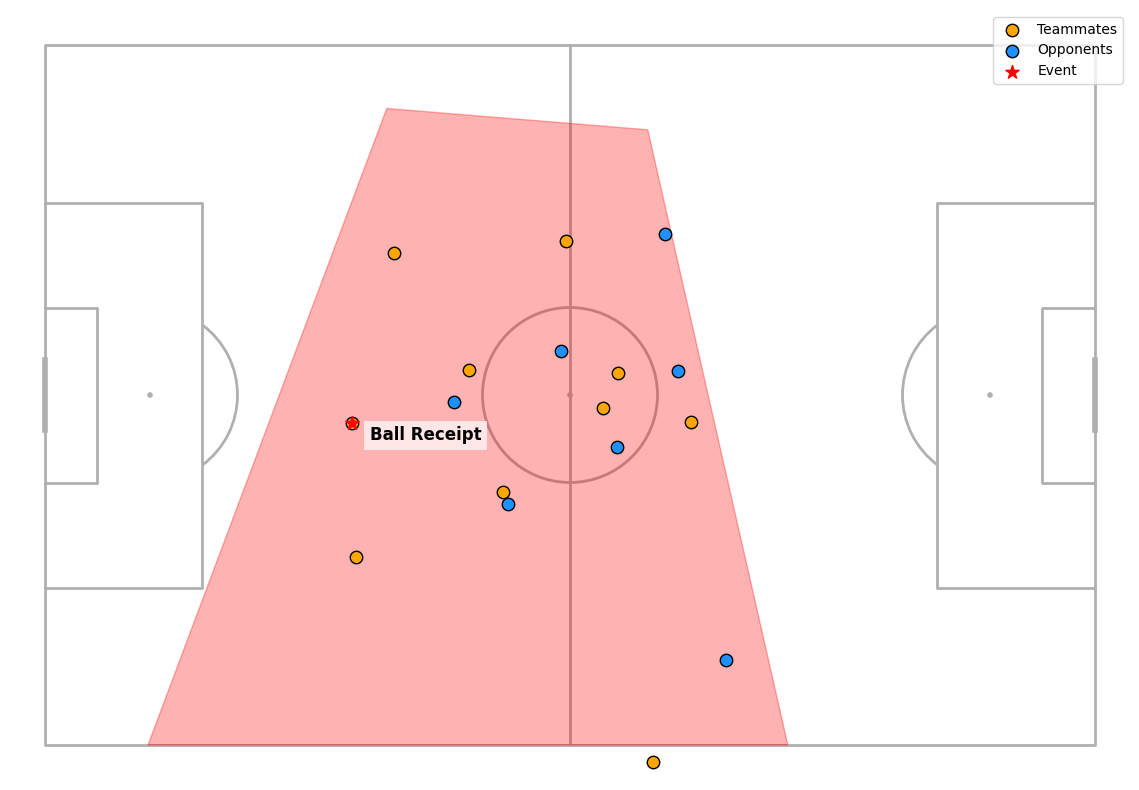

In [18]:
idx = 8

event_row = all_events.iloc[idx]
print(event_row.sub_type_name)

plot_event_with_360(event_row)


In [19]:
# Save all_events as a CSV file
#all_events.to_csv('/Users/fabio/Desktop/all_events.csv', index=False)


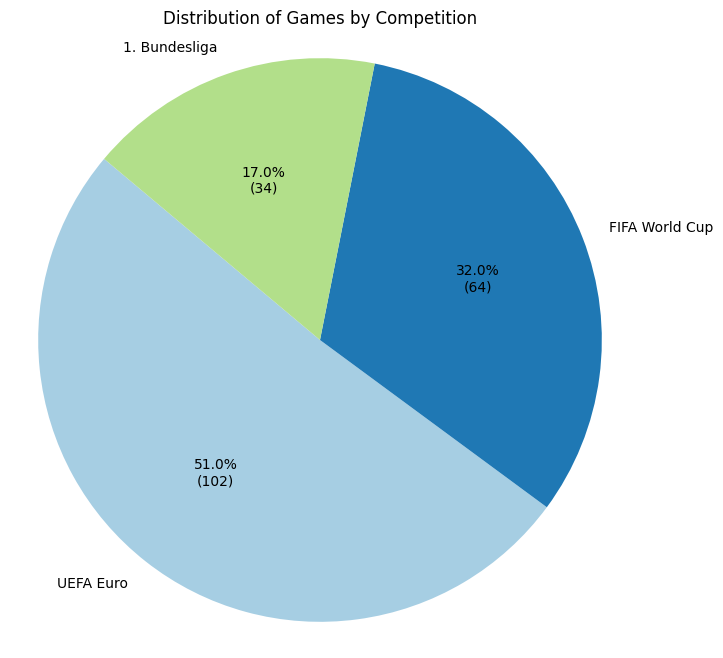

In [20]:
import matplotlib.pyplot as plt

competition_game_counts = all_events.groupby('competition_name')['match_id'].nunique().reset_index()
competition_game_counts = competition_game_counts.sort_values(by='match_id', ascending=False)

def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100 * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    competition_game_counts['match_id'],
    labels=competition_game_counts['competition_name'],
    autopct=lambda pct: autopct_format(pct, competition_game_counts['match_id']),
    startangle=140,
    colors=plt.cm.Paired.colors,
    textprops=dict(color="black")
)

plt.title('Distribution of Games by Competition')
plt.axis('equal') 

plt.show()
